# Optimisation: xNES

This example shows you how to run a global optimisation with [xNES](http://pints.readthedocs.io/en/latest/optimisers/xnes.html).

For a more elaborate example of an optimisation, see: https://github.com/martinjrobins/pints/blob/master/examples/optimisation-first-example.ipynb

Minimising error measure
using Exponential Natural Evolution Strategy (xNES)
Running in sequential mode.
Population size: 6
Iter. Eval. Best      Time m:s
0     6      1.11e+07   0:00.0
1     12     2038113    0:00.0
2     18     2038113    0:00.0
3     24     1773807    0:00.0
20    126    112491.1   0:00.0
40    246    99175.26   0:00.0
60    366    99174.66   0:00.1
80    486    99174.61   0:00.1
100   606    99174.61   0:00.1
120   726    99174.61   0:00.1
140   846    99174.61   0:00.1
160   966    99174.61   0:00.2
180   1086   99174.61   0:00.2
200   1206   99174.61   0:00.2
220   1326   99174.61   0:00.2
240   1446   99174.61   0:00.3
260   1566   99174.61   0:00.3
280   1686   99174.61   0:00.3
300   1806   99174.61   0:00.3
320   1926   99174.61   0:00.3
340   2046   99174.61   0:00.4
344   2064   99174.61   0:00.4
Halting: No significant change for 200 iterations.
Score at true solution: 
99261.9896055
Found solution:          True parameters:
 1.49847694588825762e-02     1.

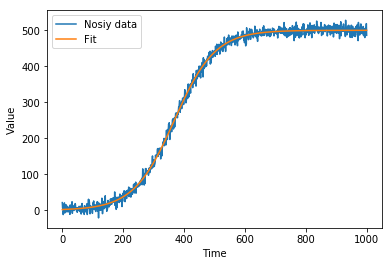

In [2]:
from __future__ import print_function
import pints
import pints.toy as toy
import numpy as np
import matplotlib.pyplot as pl

# Load a forward model
model = toy.LogisticModel()

# Create some toy data
real_parameters = [0.015, 500]
times = np.linspace(0, 1000, 1000)
values = model.simulate(real_parameters, times)

# Add noise
values += np.random.normal(0, 10, values.shape)

# Create an object with links to the model and time series
problem = pints.SingleSeriesProblem(model, times, values)

# Select a score function
score = pints.SumOfSquaresError(problem)

# Select some boundaries
boundaries = pints.Boundaries([0, 400], [0.03, 600])

# Perform an optimization with boundaries and hints
x0 = 0.011, 400
sigma0 = [0.01, 100]
found_parameters, found_value = pints.optimise(
    score,
    x0,
    sigma0,
    boundaries,
    method=pints.XNES,
    )

# Show score of true solution
print('Score at true solution: ')
print(score(real_parameters))

# Compare parameters with original
print('Found solution:          True parameters:' )
for k, x in enumerate(found_parameters):
    print(pints.strfloat(x) + '    ' + pints.strfloat(real_parameters[k]))

# Show quality of fit
pl.figure()
pl.xlabel('Time')
pl.ylabel('Value')
pl.plot(times, values, label='Nosiy data')
pl.plot(times, problem.evaluate(found_parameters), label='Fit')
pl.legend()
pl.show()